In [1]:
import pyPhyNR as pynr

In [37]:
carrier_config = pynr.core.CarrierConfig.from_bandwidth(10, 1)
carrier_config.set_sample_rate(11.52e6)
carrier_config.set_fft_size(384)
grid = carrier_config.get_resource_grid()

In [38]:
cell_id = 1
slot_pattern = [0]

# 1. SS/PBCH Block (SSB) - Fixed 20 RBs, 4 symbols
print("Adding SSB...")
ssblock = pynr.core.channels.SSBlock(
    cell_id=cell_id,
    start_rb=2,  # Start at RB 2 (leaves space for CORESET)
    start_symbol=4,  # Start at symbol 4
    slot_pattern=slot_pattern,
    ssb_index=0,
    half_frame=0
)
grid.add_channel(ssblock)

# 2. CORESET - Control region
print("Adding CORESET...")
coreset = pynr.core.channels.CORESET(
    start_rb=0,
    num_rb=24,  # 4 RBGs (24/6 = 4)
    start_symbol=0,
    num_symbols=2,
    slot_pattern=slot_pattern,
    rbg_bitmap=[1, 1, 0, 1]  # First 12 RBs and last 6 RBs active
)
grid.add_channel(coreset)

# 3. PDCCH - Control channel on CORESET
print("Adding PDCCH...")
pdcch = pynr.core.channels.PDCCH(
    start_rb=0,  # Must align with active CORESET RBs
    num_rb=6,    # Must fit within active CORESET RBs
    start_symbol=0,
    num_symbols=2,
    slot_pattern=slot_pattern,
    cell_id=cell_id
)
grid.add_channel(pdcch)

# 4. PDSCH - Data channel with DMRS
print("Adding PDSCH...")
pdsch = pynr.core.channels.PDSCH(
    start_rb=0,
    num_rb=24,
    start_symbol=8,  # After SSB (symbols 4-7)
    num_symbols=6,
    slot_pattern=slot_pattern,
    modulation=pynr.core.ModulationType.QAM64,
    dmrs_positions=[0, 2, 4, 6, 8, 10],  # Every other subcarrier
    cell_id=cell_id
)
grid.add_channel(pdsch)

# 5. Additional PDSCH in slot 1 (optional)
print("Adding additional PDSCH in slot 1...")
pdsch2 = pynr.core.channels.PDSCH(
    start_rb=0,
    num_rb=24,
    start_symbol=0,  # Start of slot 1
    num_symbols=14,  # Full slot
    slot_pattern=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],  # Slot 1
    modulation=pynr.core.ModulationType.QPSK,
    dmrs_positions=[0, 2, 4, 6, 8, 10],
    cell_id=cell_id
)
grid.add_channel(pdsch2)

Adding SSB...
Adding CORESET...
Adding PDCCH...
Adding PDSCH...
Adding additional PDSCH in slot 1...


Plotting resource grid...


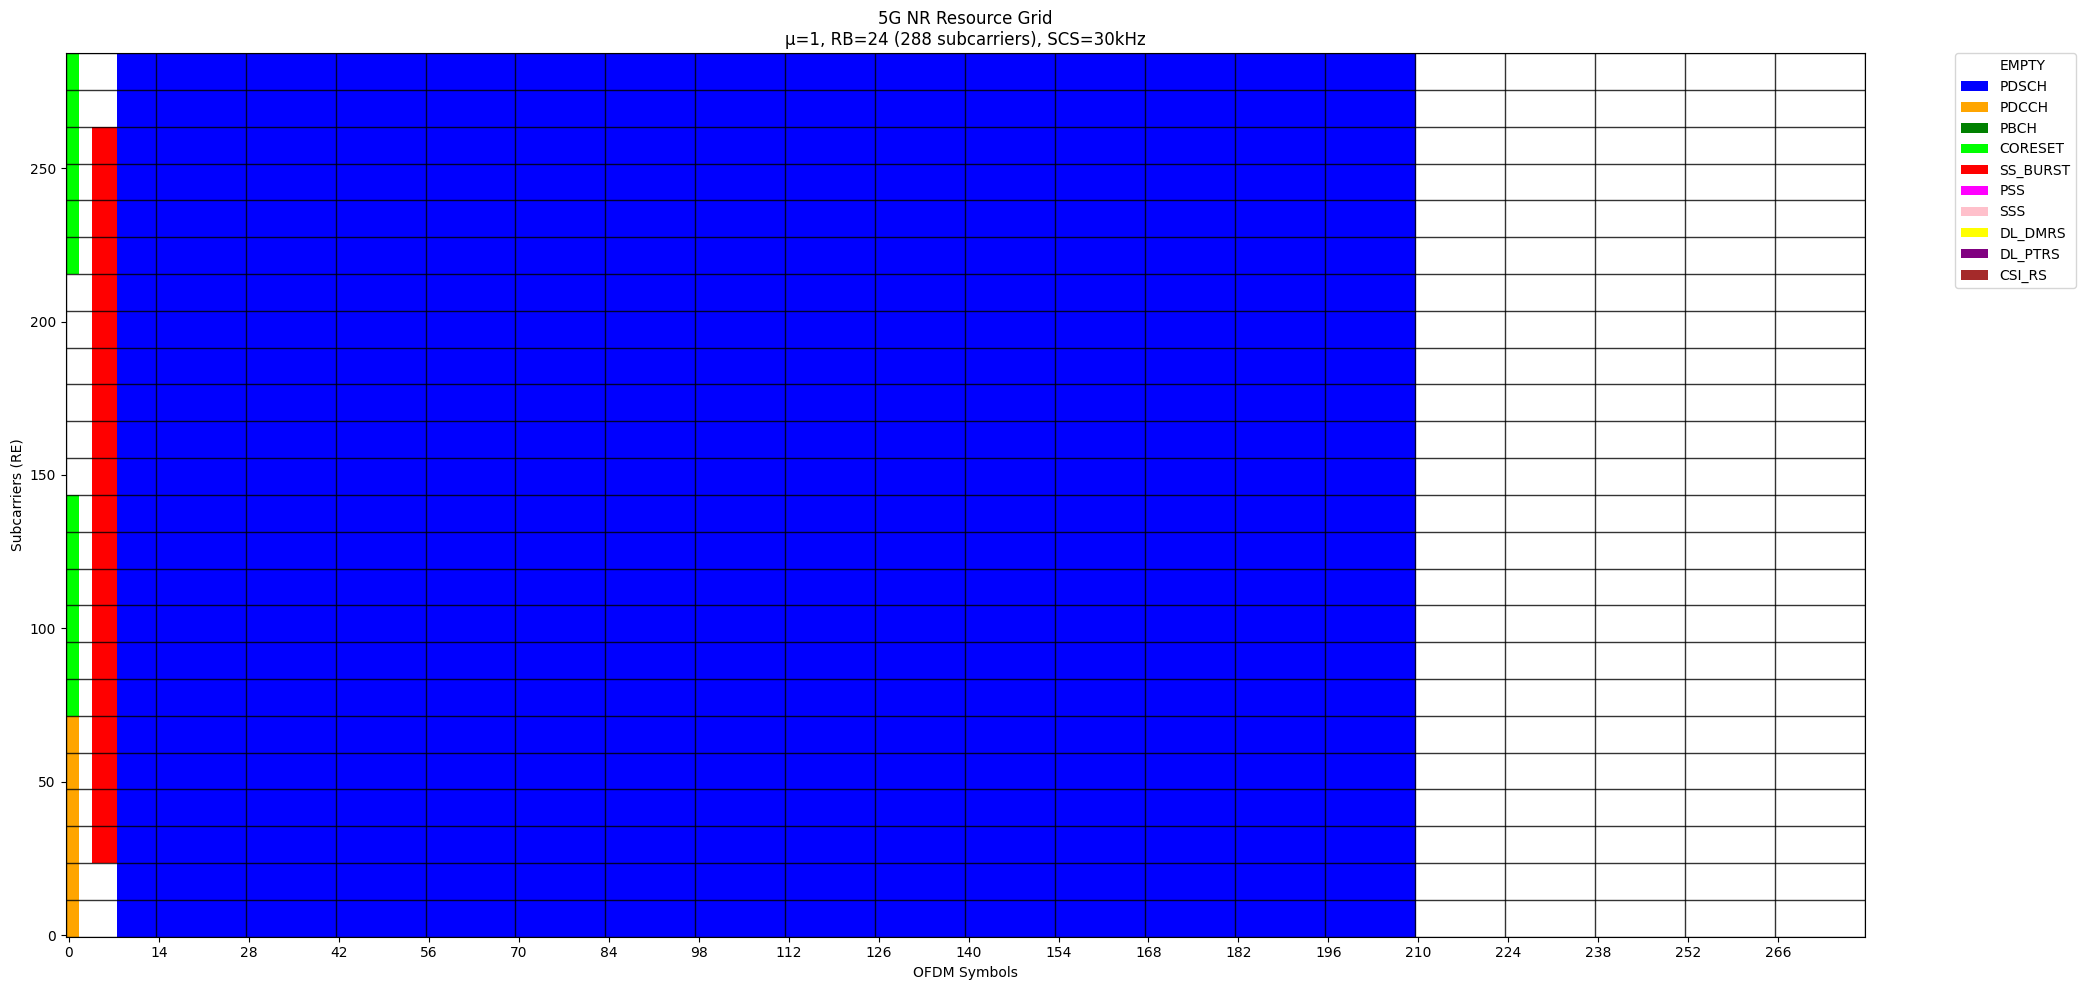

In [39]:
print("Plotting resource grid...")
pynr.utils.plot_grid_dl(carrier_config, grid)

In [51]:
print("Generating waveform...")
waveform_gen = pynr.core.WaveformGenerator()
iq_samples = waveform_gen.generate_frame_waveform(grid, carrier_config)
print(waveform_gen.get_waveform_parameters(carrier_config))

print(f"Generated {len(iq_samples)} IQ samples")
expected_samples = carrier_config.sample_rate * 0.01  # 10ms frame
print(f"Expected samples: {expected_samples:.0f}")

Generating waveform...
{'fft_size': 384, 'useful_size': 384, 'cp_short': 27, 'cp_long': 30, 'cp_per_symbol': [31, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28], 'samples_per_symbol': [415, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 412, 412], 'total_slots': 20, 'total_symbols': 280, 'total_samples': 115200, 'subcarrier_spacing': 30000.0, 'sample_rate': 11520000.0, 'slot_duration': 0.0005, 'num_rb': 24, 'numerology': 1}
Generated 115200 IQ samples
Expected samples: 115200


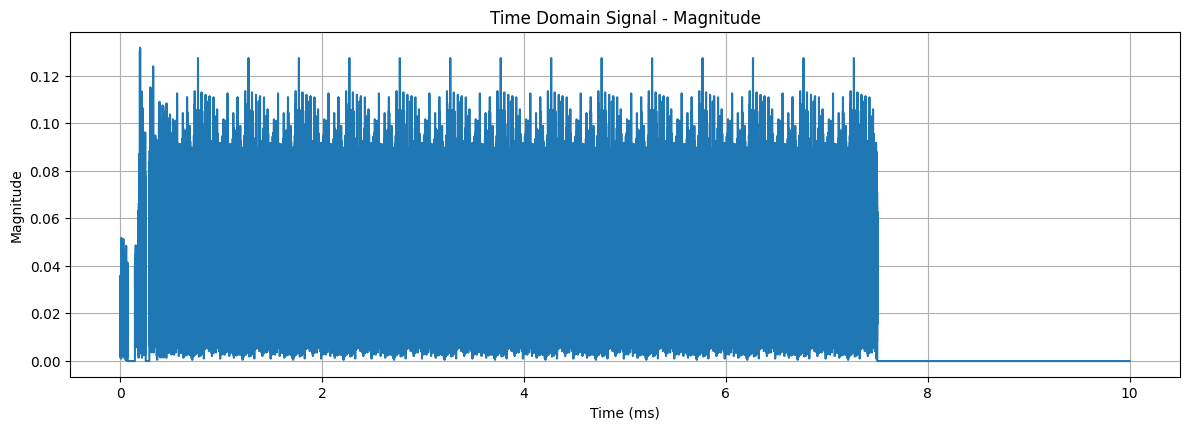

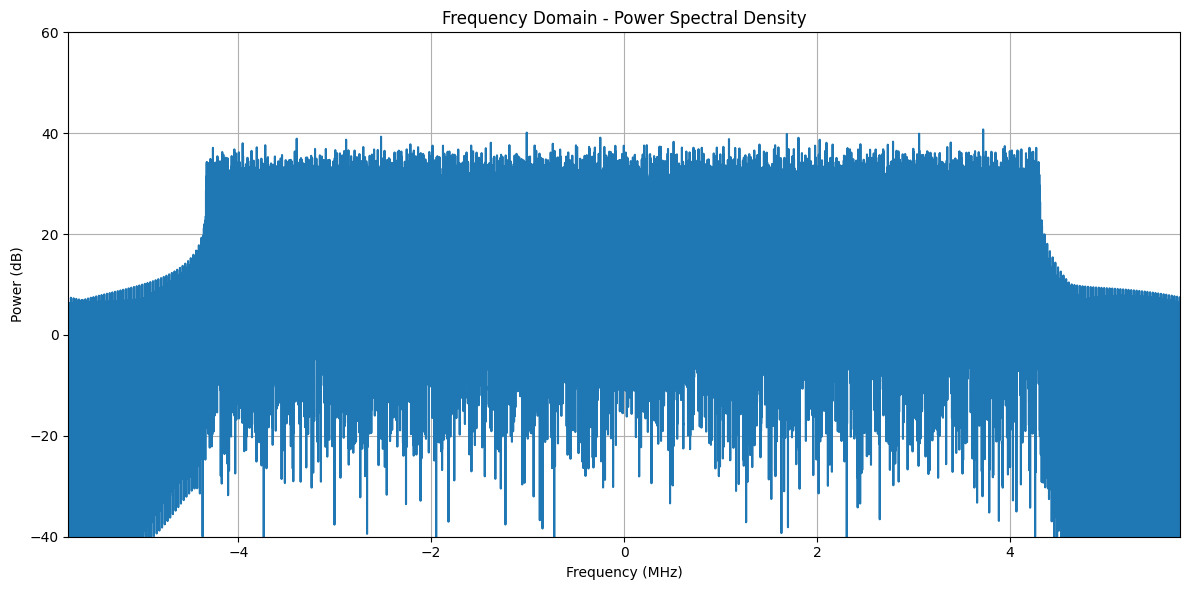

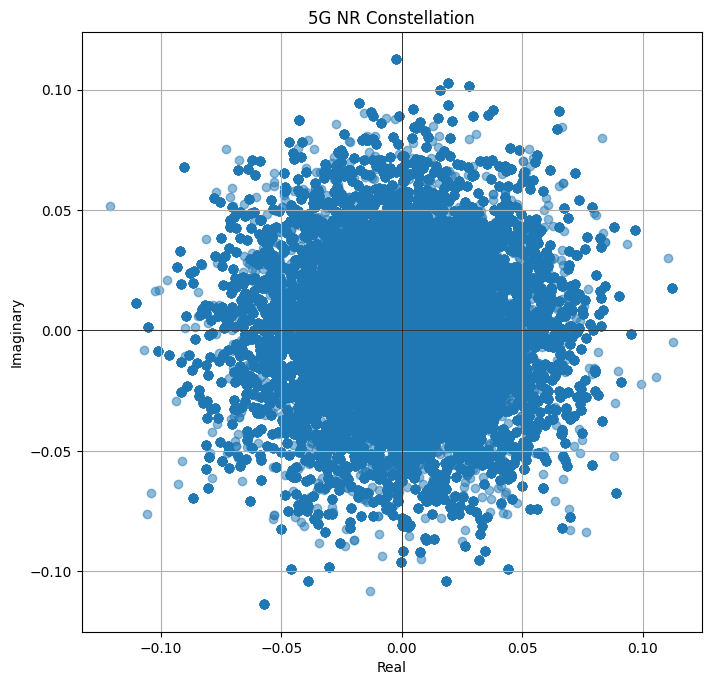

In [50]:
pynr.utils.plot_time_domain(iq_samples, carrier_config)
pynr.utils.plot_frequency_domain(iq_samples, carrier_config)
pynr.utils.plot_constellation(iq_samples, title="5G NR Constellation")

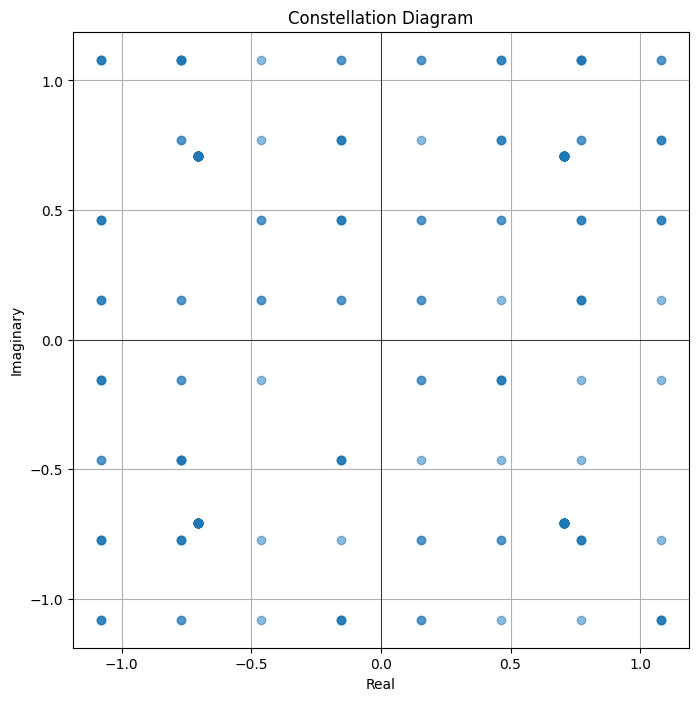

In [49]:
pynr.utils.plot_constellation(
    grid.values[:, 10],
)